In [ ]:
!pip install nltk
!pip install wordcloud
!pip install spacy
!pip install eng-spacysentiment
!pip install textblob
!python -m spacy download en_core_web_sm

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk import download
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

In [3]:
from nltk import Text as nltk_text
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
import eng_spacysentiment

nlp = spacy.load('en_core_web_sm')

from textblob import TextBlob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# лемматизация

In [7]:
def clean_text(text_str, stop_words):
  text_str = text_str.lower()
  text_list_nltk = word_tokenize(text_str)
  text_clean = [word for word in text_list_nltk if word not in stop_words and word[0].isalpha()]
  return text_clean

In [ ]:
# анализ статей The Economist & BBC

In [8]:
with open('Media_text.txt', 'r', encoding='utf-8') as f:
  text = f.read()

In [9]:
full_Media_text = clean_text(text, stop_words)
print(full_Media_text[:100])

['text', 'listen', 'story', 'enjoy', 'audio', 'podcasts', 'ios', 'android.your', 'browser', 'support', 'audio', 'element.the', 'rainforests', 'alive', 'sound', 'animals', 'besides', 'pleasure', 'din', 'also', 'useful', 'ecologists', 'want', 'measure', 'biodiversity', 'piece', 'land', 'listening', 'animal', 'calls', 'much', 'easier', 'grubbing', 'undergrowth', 'looking', 'tracks', 'spoor', 'bioacoustic', 'analysis', 'still', 'time-consuming', 'requires', 'expert', 'pair', 'ears.in', 'paper', 'published', 'october', 'nature', 'communications', 'group', 'researchers', 'led', 'jörg', 'müller', 'ecologist', 'university', 'würzburg', 'describe', 'better', 'way', 'computer', 'job', 'smartphone', 'apps', 'already', 'exist', 'identify', 'birds', 'bats', 'mammals', 'simply', 'listening', 'sounds', 'make', 'idea', 'apply', 'principle', 'conservation', 'work.the', 'researchers', 'took', 'recordings', 'across', 'sites', 'ecuadorean', 'rainforest', 'sites', 'relatively', 'pristine', 'old-growth', 'f

In [ ]:
spacy_token_Mt = []
for i in full_Media_text:
  doc = nlp(i)
  sent = []
  for token in doc:
    if token.lemma_ != '-' and token.lemma_ != '.':
      sent.append(token.lemma_)
  spacy_token_Mt.append(' '.join(sent))

In [ ]:
spacy_token_Mt

In [ ]:
len(spacy_token_Mt)

In [ ]:
# подсчёт наиболее частотных слов, биграмм, построение облака слов (статьи The Economist & BBC)

In [ ]:
from collections import Counter
Counter(spacy_token_Mt).most_common(50)

In [ ]:
frequencies_list = nltk.FreqDist(spacy_token_Mt)

word_freq = dict((word, freq) for word, freq in frequencies_list.items() if not word.isdigit())

print(word_freq)

frequencies_list.most_common(50)

In [17]:
# график наиболее частотный слов (статьи The Economist & BBC)

def plot_word_frequency(words,top_n=10):
    word_freq = nltk.FreqDist(spacy_token_Mt)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(50, 5))
    plt.title("Самые частые слова в корпусе")
    plt.ylabel("Count")
    plt.xlabel("Word")
    plot = sns.barplot(x=labels, y=counts)
    return plot

<Axes: title={'center': 'Самые частые слова в корпусе'}, xlabel='Word', ylabel='Count'>

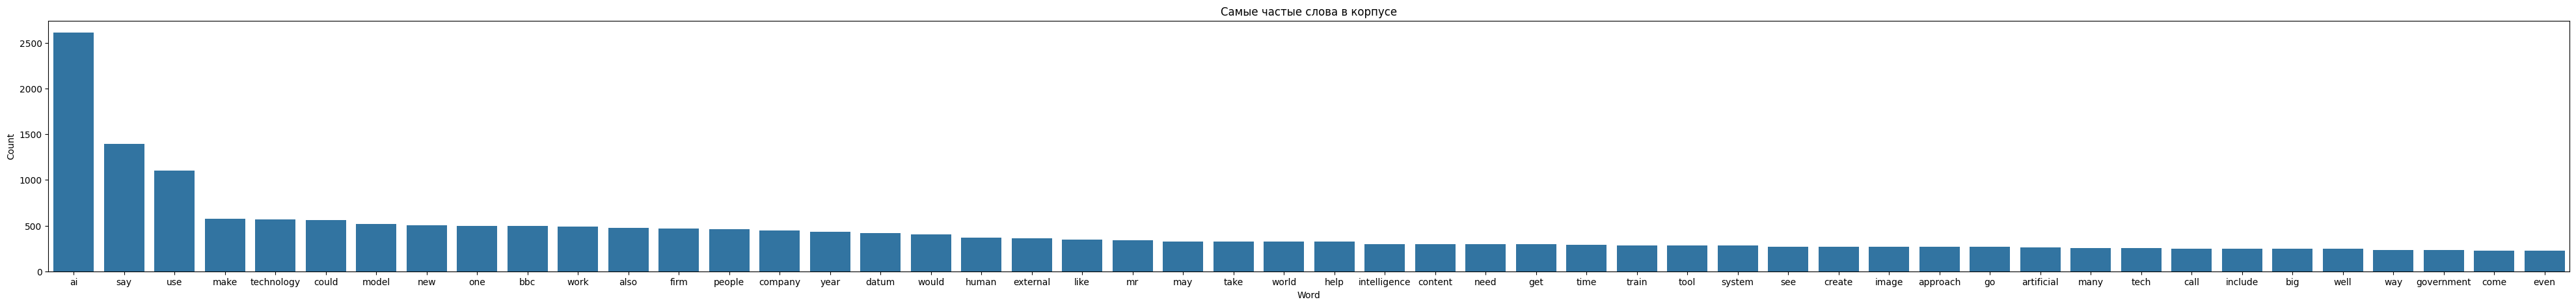

In [18]:
plot_word_frequency(spacy_token_Mt,50)

In [ ]:
# облако слов (статьи The Economist & BBC)

In [19]:
from wordcloud import WordCloud
%matplotlib inline

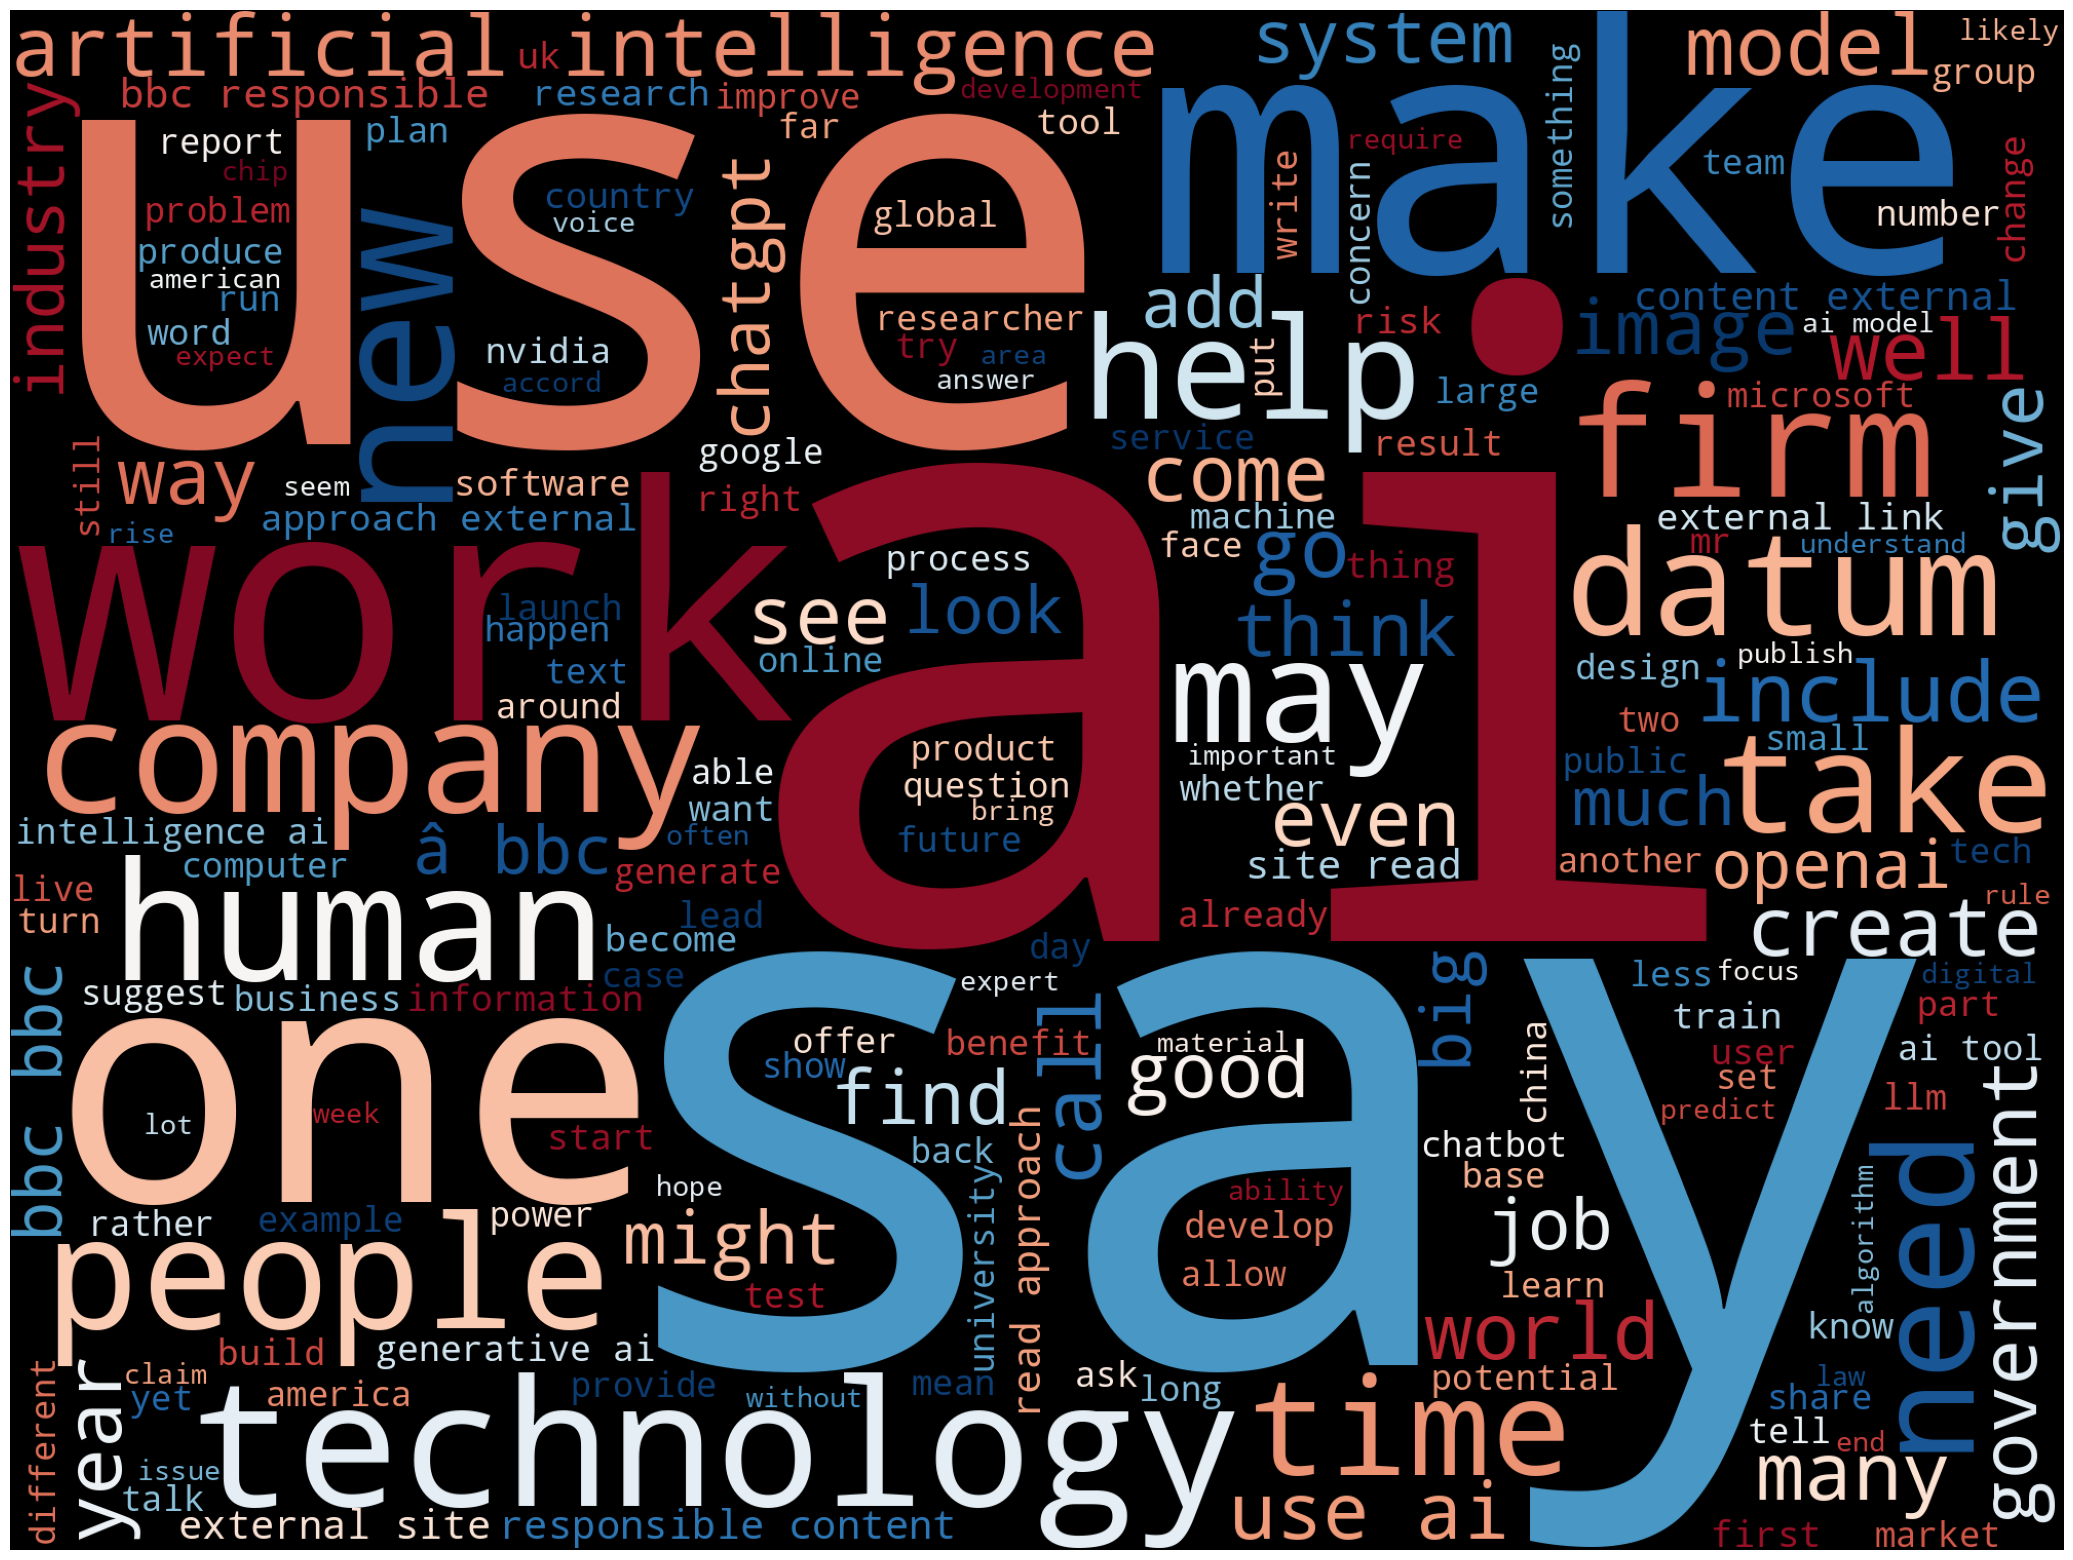

In [20]:
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      background_color='black',
                      colormap='RdBu').generate(', '.join(spacy_token_Mt))
plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [21]:
# биграммы (статьи The Economist & BBC)

freq_bigramms = Counter(nltk.bigrams(spacy_token_Mt))
freq_bigramms.most_common(10)

[(('artificial', 'intelligence'), 241),
 (('use', 'ai'), 208),
 (('â ©', 'bbc'), 171),
 (('bbc', 'bbc'), 171),
 (('bbc', 'responsible'), 171),
 (('responsible', 'content'), 171),
 (('content', 'external'), 171),
 (('external', 'site'), 171),
 (('site', 'read'), 171),
 (('read', 'approach'), 171)]

In [22]:
freq_bigramms = Counter(nltk.bigrams(full_Media_text))
freq_bigramms.most_common(10)

[(('artificial', 'intelligence'), 240),
 (('â©', 'bbc'), 171),
 (('bbc', 'bbc'), 171),
 (('bbc', 'responsible'), 171),
 (('responsible', 'content'), 171),
 (('content', 'external'), 171),
 (('external', 'sites'), 171),
 (('sites', 'read'), 171),
 (('read', 'approach'), 171),
 (('approach', 'external'), 171)]

In [ ]:
# sentiment analysis blob всего текста (статьи The Economist & BBC)

In [23]:
full_Media_text = '. '.join(spacy_token_Mt)
doc = nlp(full_Media_text)
print(doc.cats)

print(TextBlob(full_Media_text).sentiment)

{}
Sentiment(polarity=0.0540049408543843, subjectivity=0.4374102859199702)


In [ ]:
# анализ заголовков Fox News

In [24]:
with open('fxn_headers.txt', 'r', encoding='utf-8') as f:
  text = f.read()

In [36]:
full_fxn_headers_text = clean_text(text, stop_words)
print(full_fxn_headers_text[:100])

['headers', 'justice', 'department', 'taps', 'former', 'kamala', 'harris', 'adviser', 'artificial', 'intelligence', 'officer', 'artificial', 'intelligence', 'ai', 'biden', 'push', 'protect', 'american', 'tech', 'china', 'garners', 'mixed', 'reviews', 'experts', 'agi', 'artificial', 'intelligence', 'speaker', 'johnson', 'launches', 'bipartisan', 'artificial', 'intelligence', 'task', 'force', 'artificial', 'intelligence', 'frequently', 'asked', 'questions', 'ai', 'ai', 'comes', 'world', 'beauty', 'eyelash', 'robot', 'uses', 'artificial', 'intelligence', 'place', 'fake', 'lashes', 'ai-assisted', 'fraud', 'schemes', 'could', 'cost', 'taxpayers', 'trillion', 'year', 'expert', 'says', 'dangers', 'ai', 'find', 'people', 'afraid', 'artificial', 'intelligence', 'artificial', 'intelligence', 'experts', 'address', 'bias', 'chatgpt', 'hard', 'prevent', 'bias', "happening'", 'artificial', 'intelligence', 'health', 'care', 'new', 'product', 'acts', "doctors'", 'artificial', 'intelligence', 'ai', 'po

In [37]:
spacy_token_fxnh = []
for i in full_fxn_headers_text:
  doc = nlp(i)
  sent = []
  for token in doc:
    if token.lemma_ != '-' and token.lemma_ != '.':
      sent.append(token.lemma_)
  spacy_token_fxnh.append(' '.join(sent))

In [ ]:
spacy_token_fxnh

In [28]:
len(spacy_token_fxnh)

890

In [ ]:
# подсчёт наиболее частотных слов, биграмм, построение облака слов (заголовки Fox News)

In [ ]:
from collections import Counter
Counter(spacy_token_fxnh).most_common(50)

In [ ]:
frequencies_list = nltk.FreqDist(spacy_token_fxnh)

word_freq = dict((word, freq) for word, freq in frequencies_list.items() if not word.isdigit())

print(word_freq)

frequencies_list.most_common(50)

In [31]:
#график наиболее частотный слов (заголовки Fox News)

def plot_word_frequency(words,top_n=10):
    word_freq = nltk.FreqDist(spacy_token_fxnh)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(50, 5))
    plt.title("Самые частые слова в корпусе")
    plt.ylabel("Count")
    plt.xlabel("Word")
    plot = sns.barplot(x=labels, y=counts)
    return plot

<Axes: title={'center': 'Самые частые слова в корпусе'}, xlabel='Word', ylabel='Count'>

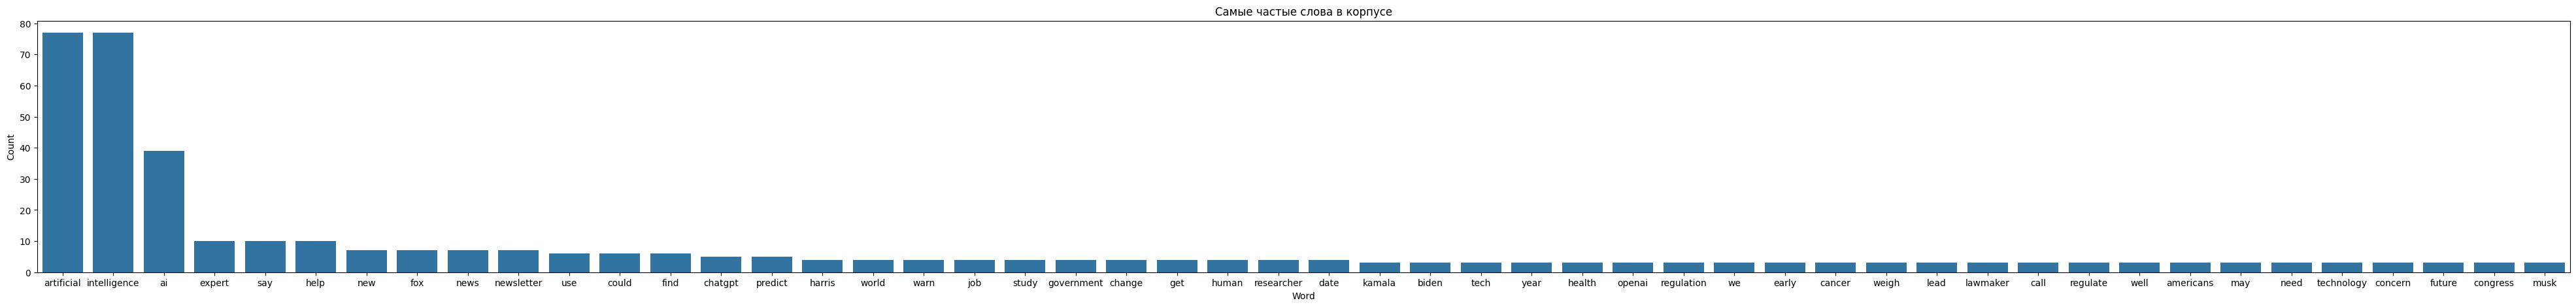

In [32]:
plot_word_frequency(spacy_token_fxnh,50)

In [ ]:
# облако слов (заголовки Fox News)

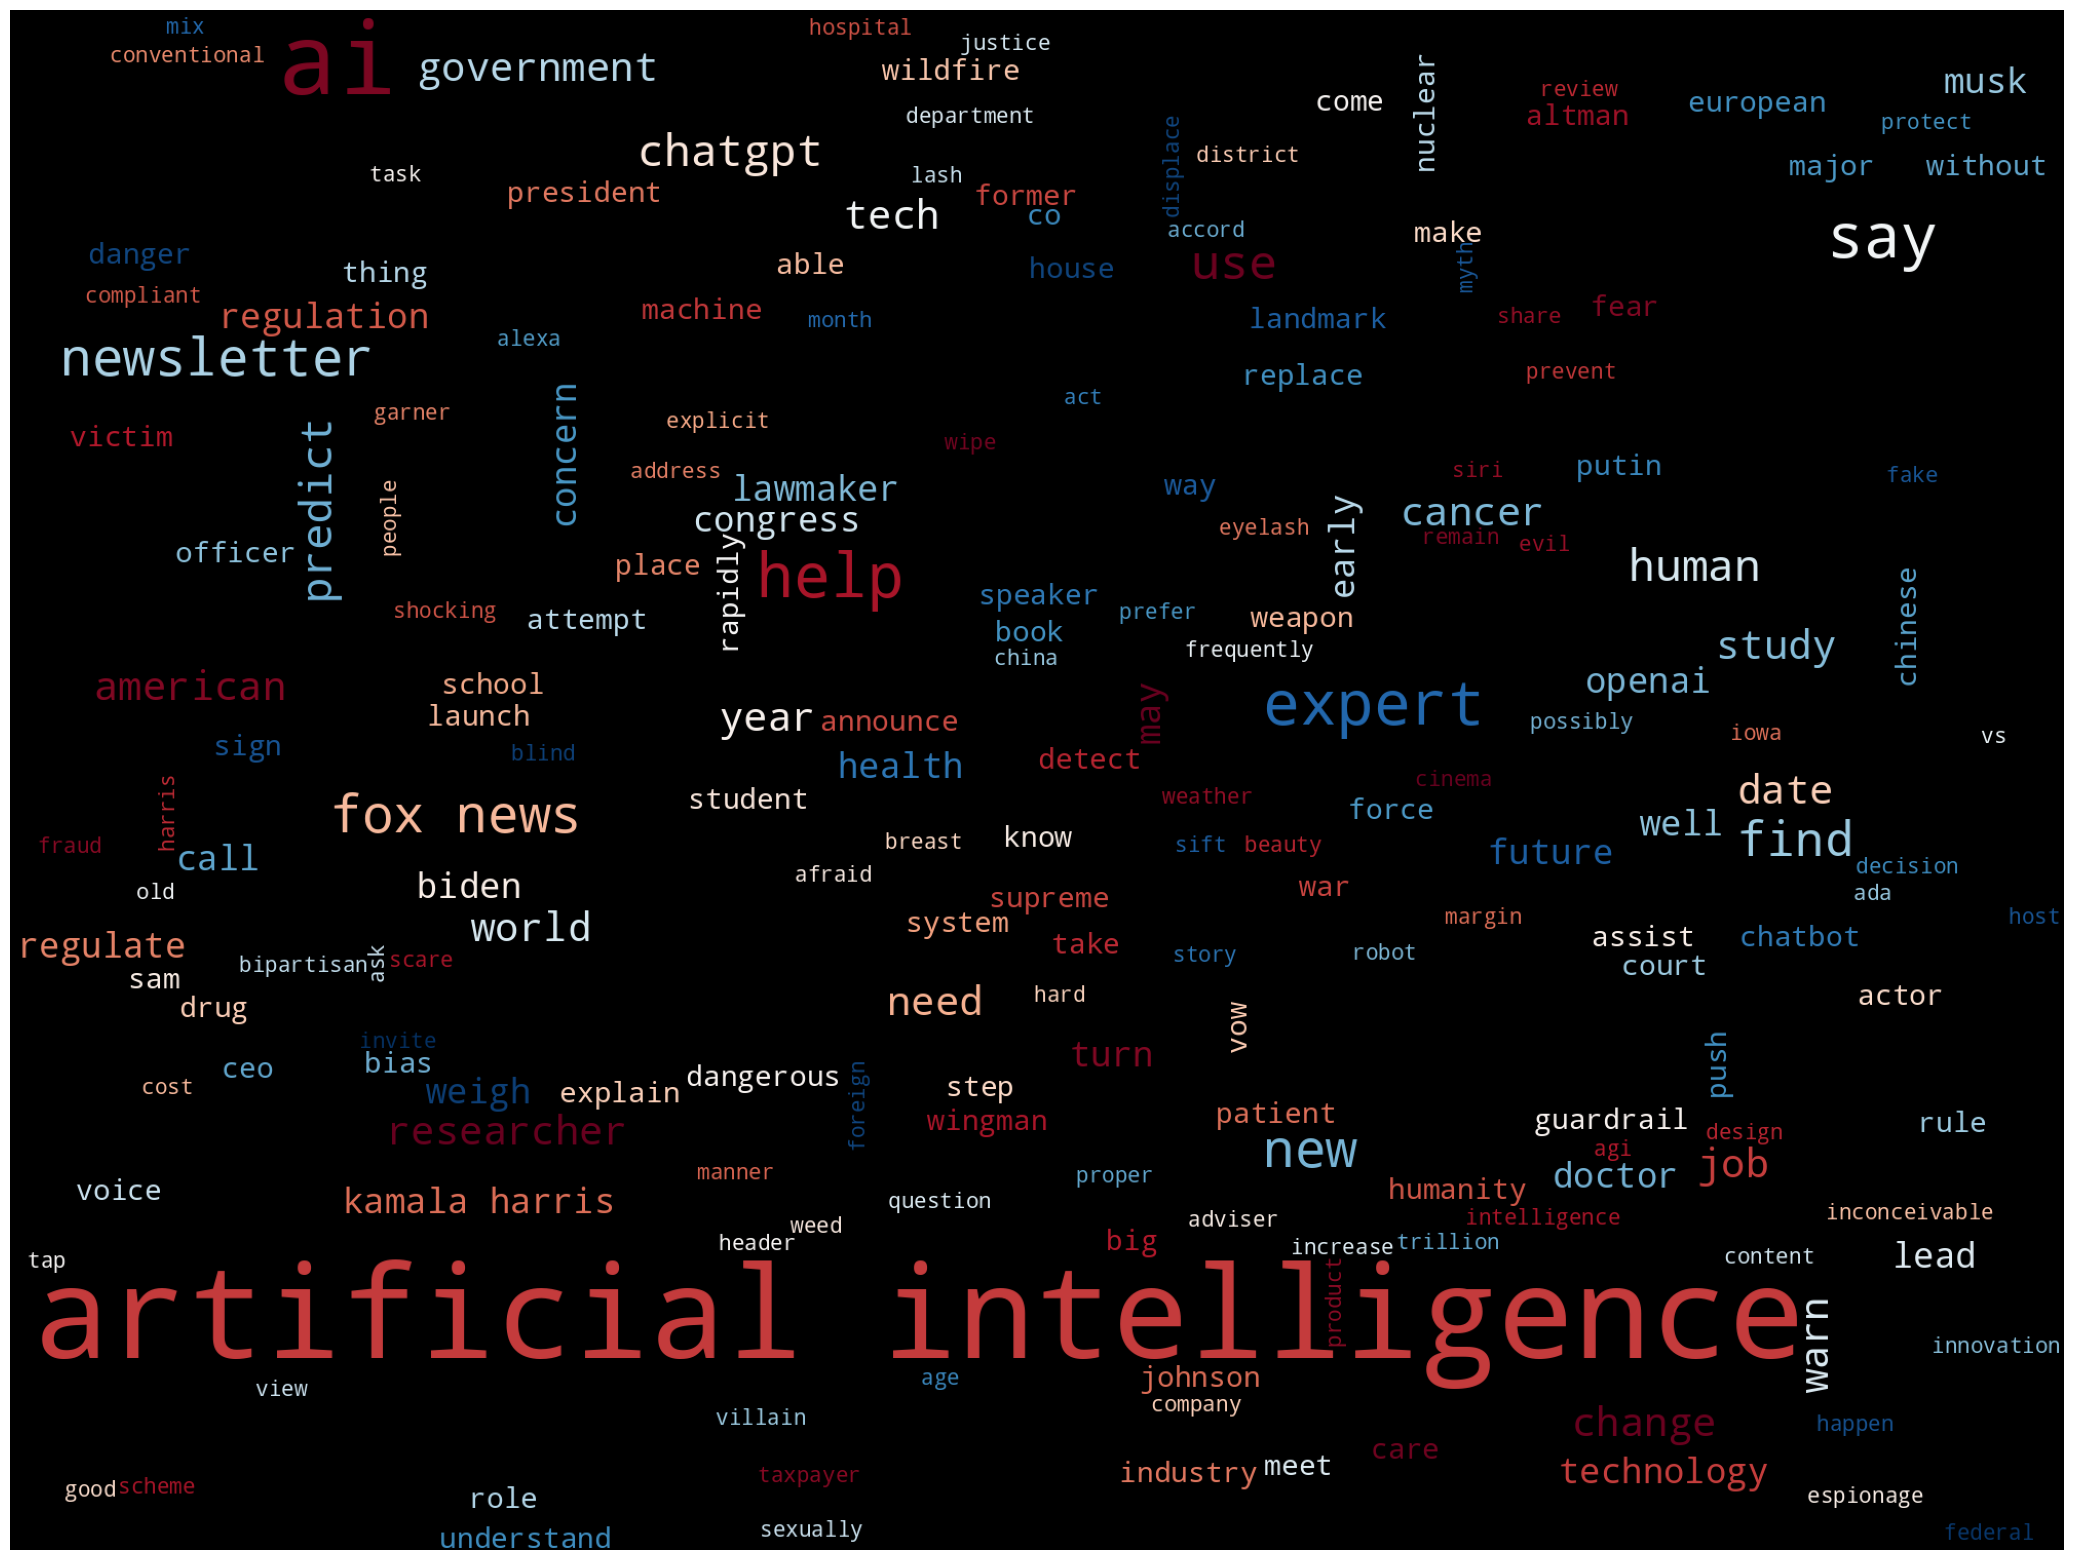

In [33]:
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      background_color='black',
                      colormap='RdBu').generate(', '.join(spacy_token_fxnh))
plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [38]:
# биграммы (заголовки Fox News)

freq_bigramms = Counter(nltk.bigrams(spacy_token_fxnh))
freq_bigramms.most_common(10)

[(('artificial', 'intelligence'), 76),
 (('fox', 'news'), 7),
 (('use', 'artificial'), 5),
 (('intelligence', 'help'), 5),
 (('news', 'artificial'), 5),
 (('intelligence', 'newsletter'), 5),
 (('intelligence', 'ai'), 4),
 (('expert', 'say'), 4),
 (('kamala', 'harris'), 3),
 (('intelligence', 'artificial'), 3)]

In [39]:
freq_bigramms = Counter(nltk.bigrams(full_fxn_headers_text))
freq_bigramms.most_common(10)

[(('artificial', 'intelligence'), 76),
 (('fox', 'news'), 7),
 (('news', 'artificial'), 5),
 (('intelligence', 'newsletter'), 5),
 (('intelligence', 'ai'), 4),
 (('kamala', 'harris'), 3),
 (('intelligence', 'artificial'), 3),
 (('intelligence', 'experts'), 3),
 (('intelligence', 'could'), 3),
 (('intelligence', 'help'), 3)]

In [ ]:
# анализ тональности (заголовки Fox News)

In [ ]:
with open('fxn_headers.txt', 'r', encoding='utf-8') as f:
  text = f.read()

text = text.split('\n')
text

In [ ]:
def get_clean_tokens(text):
  text = text.lower()
  text_tokens = word_tokenize(text)
  clean_tokens = []
  for i in text_tokens:
    if i[0].isalpha() and i not in stop_words:
      clean_tokens.append(i)
  return clean_tokens

clean_text = []
for i in text:
  sent = get_clean_tokens(i)
  clean_text.append(' '.join(sent))
clean_text

In [42]:
nlp = spacy.load("en_core_web_sm")

spacy_token_fxnh = []
for i in clean_text:
  doc = nlp(i)
  sent = []
  for token in doc:
    if token.lemma_ != '-' and token.lemma_ != '.':
      sent.append(token.lemma_)
  spacy_token_fxnh.append(' '.join(sent))

In [ ]:
spacy_token_fxnh

In [44]:
df = pd.DataFrame(spacy_token_fxnh[1:], columns=['header'])
df

,header
0,justice department taps former kamala harris a...
1,artificial intelligence ai
2,biden push protect american tech china garner ...
3,agi artificial intelligence
4,speaker johnson launch bipartisan artificial i...
...,...
96,vice president kamala harris attempt explain a...
97,european union aggregate cancer imaging datum ...
98,dhs release new guardrail use ai mission annou...
99,artificial intelligence step assist dementia p...


In [ ]:
# sentiment analysis spacy (заголовки Fox News)

In [45]:
nlp = eng_spacysentiment.load()

spacy_pos = []
spacy_neg = []
for i in df.header:
  doc = nlp(i)
  spacy_pos.append(round(doc.cats['positive'], 5))
  spacy_neg.append(round(doc.cats['negative'], 5))

df['spacy_pos'] = spacy_pos
df['spacy_neg'] = spacy_neg
df

,header,spacy_pos,spacy_neg
0,justice department taps former kamala harris a...,0.89715,0.00860
1,artificial intelligence ai,0.27172,0.08447
2,biden push protect american tech china garner ...,0.88387,0.02005
3,agi artificial intelligence,0.33056,0.15418
4,speaker johnson launch bipartisan artificial i...,0.43155,0.31663
...,...,...,...
96,vice president kamala harris attempt explain a...,0.14349,0.03681
97,european union aggregate cancer imaging datum ...,0.30257,0.26791
98,dhs release new guardrail use ai mission annou...,0.67194,0.09115
99,artificial intelligence step assist dementia p...,0.18816,0.11980


In [ ]:
# sentiment analysis blob (заголовки MIT)

In [46]:
blob_polar = []
blob_subj = []
for i in df.header:
  analysis = TextBlob(i).sentiment
  blob_polar.append(round(analysis[0], 5))
  blob_subj.append(round(analysis[1], 5))

df['blob_polar'] = blob_polar
df['blob_subj'] = blob_subj
df

,header,spacy_pos,spacy_neg,blob_polar,blob_subj
0,justice department taps former kamala harris a...,0.89715,0.00860,-0.30000,0.50000
1,artificial intelligence ai,0.27172,0.08447,-0.60000,1.00000
2,biden push protect american tech china garner ...,0.88387,0.02005,0.00000,0.12500
3,agi artificial intelligence,0.33056,0.15418,-0.60000,1.00000
4,speaker johnson launch bipartisan artificial i...,0.43155,0.31663,-0.60000,1.00000
...,...,...,...,...,...
96,vice president kamala harris attempt explain a...,0.14349,0.03681,-0.30000,0.60000
97,european union aggregate cancer imaging datum ...,0.30257,0.26791,-0.16667,0.43333
98,dhs release new guardrail use ai mission annou...,0.67194,0.09115,0.13636,0.45455
99,artificial intelligence step assist dementia p...,0.18816,0.11980,-0.22000,0.77000


In [ ]:
# анализ текстов статей Fox News

In [47]:
def clean_text(text_str, stop_words):
  text_str = text_str.lower().replace('xa0', ' ')
  text_list_nltk = word_tokenize(text_str)
  text_clean = [word for word in text_list_nltk if word not in stop_words and word[0].isalpha()]
  return text_clean

In [48]:
with open('fxn_text.txt', 'r', encoding='utf-8') as f:
  text = f.read()

In [49]:
full_fxnt_text = clean_text(text, stop_words)
print(full_fxnt_text[:100])

['text', 'carlos', 'gimenez', 'grilled', 'fbi', 'director', 'chris', 'wray', 'ai', 'china', 'hearing', 'held', 'house', 'select', 'committee', 'china', 'credit', 'house', 'representatives', 'justice', 'department', 'named', 'first-ever', 'official', 'focused', 'artificial', 'intelligence', 'ai', 'thursday', 'anticipation', 'rapidly', 'evolving', 'technology', 'impact', 'criminal', 'justice', 'system.\\', 'mayer', 'professor', 'princeton', 'university', 'focuses', 'intersection', 'technology', 'law', 'emphasis', 'national', 'security', 'criminal', 'procedure', 'consumer', 'privacy', 'network', 'management', 'online', 'speech', 'according', 'online', 'biography', 'selected', 'serve', 'doj\\', 'chief', 'science', 'technology', 'adviser', 'chief', 'ai', 'officer', 'reuters', 'reported.\\', 'justice', 'department', 'must', 'keep', 'pace', 'rapidly', 'evolving', 'scientific', 'technological', 'developments', 'order', 'fulfill', 'mission', 'uphold', 'rule', 'law', 'keep', 'country', 'safe', '

In [50]:
nlp = spacy.load("en_core_web_sm")

spacy_token_fxnt = []
for i in full_fxnt_text:
  doc = nlp(i)
  sent = []
  for token in doc:
    if token.lemma_ != '-' and token.lemma_ != '.':
      sent.append(token.lemma_)
  spacy_token_fxnt.append(' '.join(sent))

In [ ]:
spacy_token_fxnt

In [52]:
len(spacy_token_fxnt)

49110

In [ ]:
# подсчёт наиболее частотных слов, биграмм, построение облака слов (статьи Fox News)

In [ ]:
Counter(spacy_token_fxnt).most_common(50)

In [ ]:
frequencies_list = nltk.FreqDist(spacy_token_fxnt)

word_freq = dict((word, freq) for word, freq in frequencies_list.items() if not word.isdigit())

print(word_freq)

frequencies_list.most_common(50)

In [55]:
# график наиболее частотный слов (статьи Fox News)

def plot_word_frequency(words,top_n=10):
    word_freq = nltk.FreqDist(spacy_token_fxnt)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(50, 5))
    plt.title("Самые частые слова в корпусе")
    plt.ylabel("Count")
    plt.xlabel("Word")
    plot = sns.barplot(x=labels, y=counts)
    return plot

<Axes: title={'center': 'Самые частые слова в корпусе'}, xlabel='Word', ylabel='Count'>

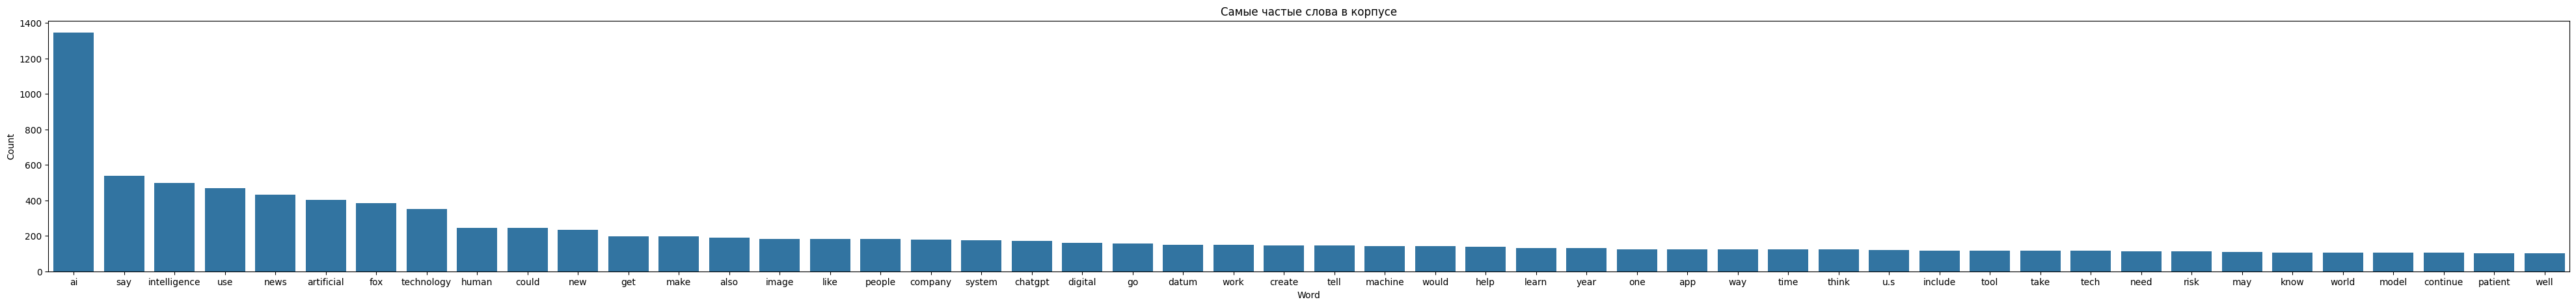

In [56]:
plot_word_frequency(spacy_token_fxnt,50)

In [ ]:
# облако слов (статьи Fox News)

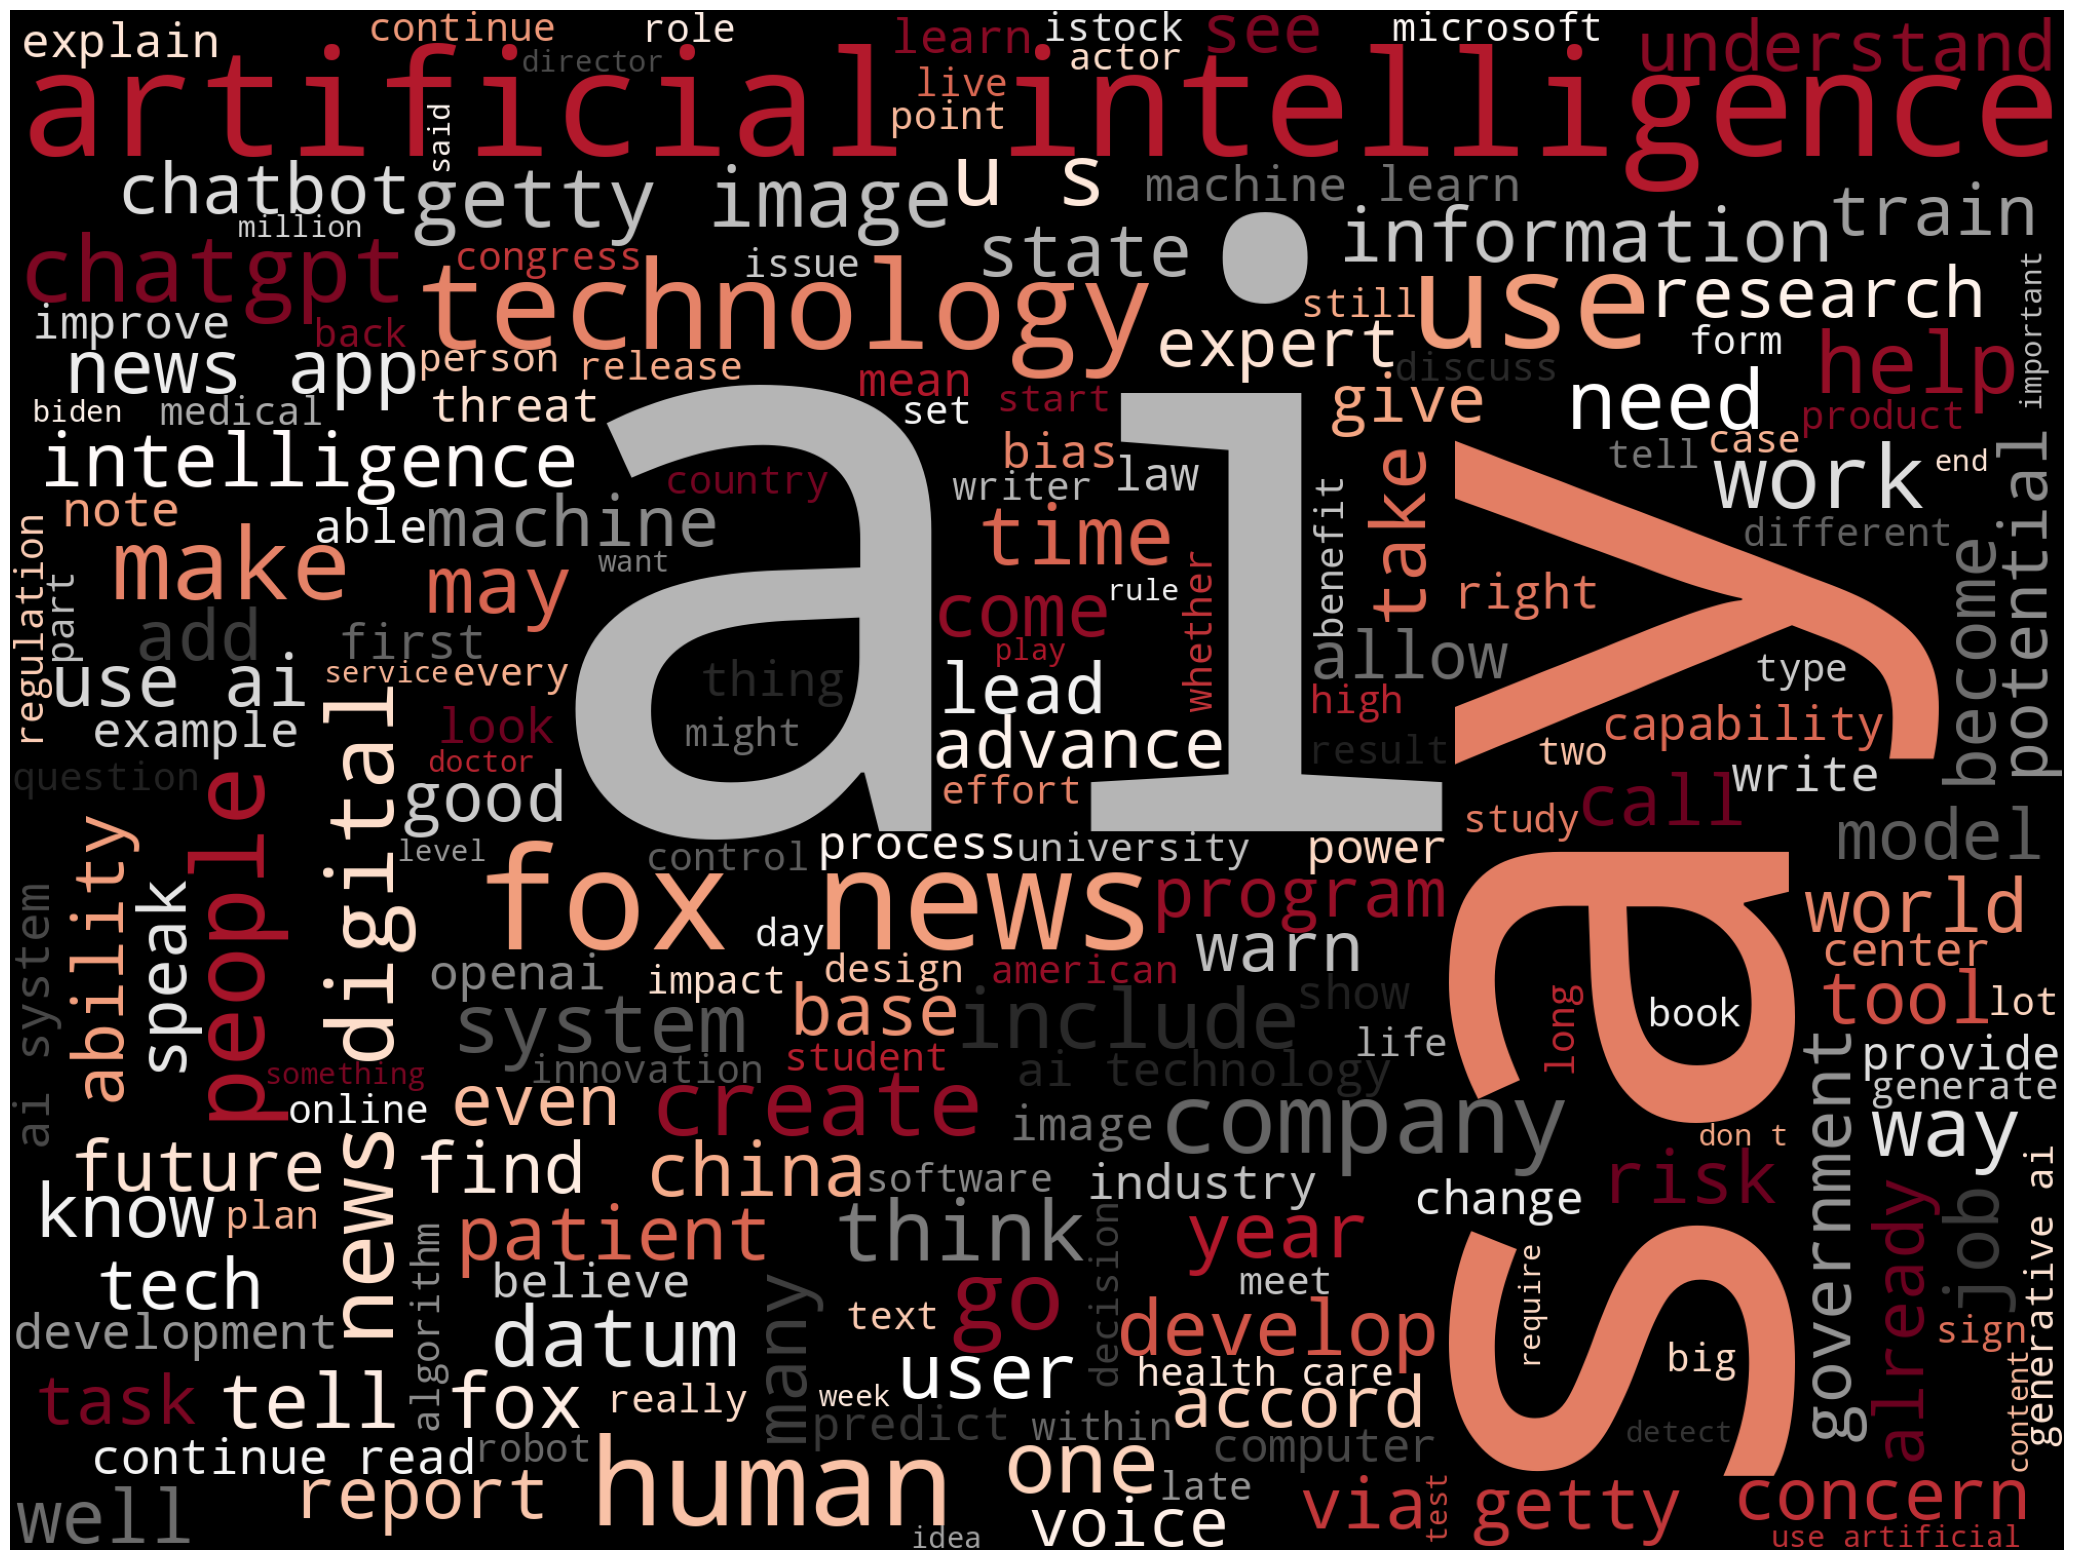

In [57]:
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      background_color='black',
                      colormap='RdGy').generate(', '.join(spacy_token_fxnt))
plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [58]:
# биграммы (статьи Fox News)

freq_bigramms = Counter(nltk.bigrams(spacy_token_fxnt))
freq_bigramms.most_common(10)

[(('artificial', 'intelligence'), 377),
 (('fox', 'news'), 342),
 (('news', 'digital'), 130),
 (('tell', 'fox'), 97),
 (('get', 'fox'), 89),
 (('getty', 'image'), 88),
 (('news', 'app'), 86),
 (('use', 'ai'), 80),
 (('via', 'getty'), 79),
 (('ai', 'system'), 58)]

In [59]:
freq_bigramms = Counter(nltk.bigrams(full_fxnt_text))
freq_bigramms.most_common(10)

[(('artificial', 'intelligence'), 377),
 (('fox', 'news'), 342),
 (('news', 'digital'), 130),
 (('told', 'fox'), 90),
 (('get', 'fox'), 89),
 (('getty', 'images'), 88),
 (('news', 'app'), 86),
 (('via', 'getty'), 79),
 (('machine', 'learning'), 55),
 (('ai', 'systems'), 51)]

In [ ]:
# sentiment analysis blob всего текста (статьи Fox News)

In [60]:
full_fxnt_text = '. '.join(spacy_token_fxnt)
doc = nlp(full_fxnt_text)
print(doc.cats)

print(TextBlob(full_fxnt_text).sentiment)

{}
Sentiment(polarity=0.024316929911030447, subjectivity=0.47106954546181995)
